In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

DATA LOADING

In [3]:
train_set = pd.read_csv('fashion-mnist_train.csv')  # replace with actual file path
test_set = pd.read_csv('fashion-mnist_test.csv')

In [4]:
train_set.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
train_set.isnull().sum()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

In [5]:
test_set.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
train_set.shape

(60000, 785)

In [7]:
test_set.shape

(10000, 785)

In [49]:
train_labels1 = train_set['label']
train_pixels1 = train_set.drop('label', axis=1)

test_labels1 = test_set['label']
test_pixels1 = test_set.drop('label', axis=1)

In [50]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
test_pixels_normalized = scaler.fit_transform(test_pixels1)

train_pixels_normalized = scaler.fit_transform(train_pixels1)

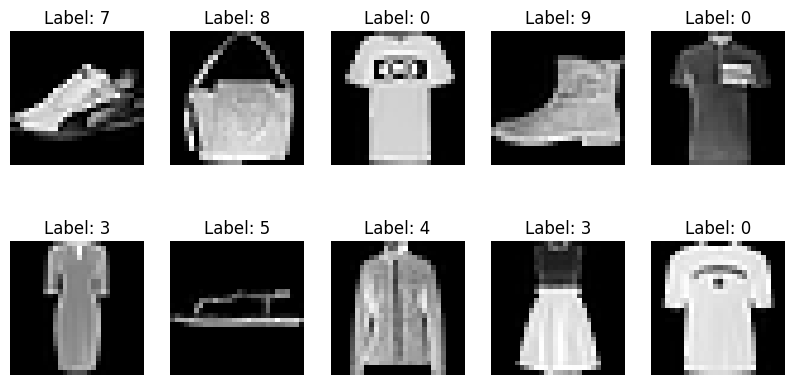

In [ ]:
plt.figure(figsize=(10, 5))
for i in range(10):
    index = np.random.randint(0, len(test_pixels_normalized))
    image = test_pixels_normalized[index].reshape(28, 28)  # reshape to 28x28
    label = test_labels1.iloc[index]

    plt.subplot(2, 5, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f'Label: {label}')
    plt.axis('off')
plt.show()

In [51]:
from sklearn.model_selection import train_test_split

train_pixels, val_pixels, train_labels, val_labels = train_test_split(
    train_pixels_normalized, train_labels1, test_size=10000, random_state=42
)

In [12]:
# import warnings
# warnings.filterwarnings('ignore')
# from sklearn.metrics import log_loss
# from sklearn.neural_network import MLPClassifier

# layer_sizes = [128, 64, 32]
# max_iter = 100
# batch_size = 128
# learning_rate_init = 2e-5
# activations = ['logistic', 'tanh', 'relu', 'identity']
# results = {}

# for activation in activations:
#     print(f"\nTraining MLP with activation: {activation}")

#     # Initialize MLP Classifier
#     mlp = MLPClassifier(hidden_layer_sizes=layer_sizes, max_iter=1, 
#                         solver='adam', batch_size=batch_size, 
#                         learning_rate_init=learning_rate_init, 
#                         activation=activation, warm_start=True)

#     train_losses = []
#     val_losses = []

#     # Train over 100 epochs to manually record loss
#     for epoch in range(max_iter):
#         # Fit model on training data
#         mlp.fit(train_pixels, train_labels)

#         # Calculate and store training loss
#         train_preds = mlp.predict_proba(train_pixels)
#         train_loss = log_loss(train_labels, train_preds)
#         train_losses.append(train_loss)

#         # Calculate and store validation loss
#         val_preds = mlp.predict_proba(val_pixels)
#         val_loss = log_loss(val_labels, val_preds)
#         val_losses.append(val_loss)

#         print(f"Epoch {epoch+1}/{max_iter} - Training Loss: {train_loss} - Validation Loss: {val_loss}")

#     # Store results for this activation function
#     results[activation] = {'train_losses': train_losses, 'val_losses': val_losses}

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import log_loss, accuracy_score
from sklearn.neural_network import MLPClassifier

# Parameters for the MLP model
layer_sizes = [128, 64, 32]
max_iter = 100
batch_size = 128
learning_rate_init = 2e-5
activations = ['logistic', 'tanh', 'relu', 'identity']

# Store results for each activation function
results = {}

for activation in activations:
    print(f"\nTraining MLP with activation: {activation}")

    mlp = MLPClassifier(hidden_layer_sizes=layer_sizes, max_iter=1, 
                        solver='adam', batch_size=batch_size, 
                        learning_rate_init=learning_rate_init, 
                        activation=activation, warm_start=True)

    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    for epoch in range(max_iter):
        mlp.fit(train_pixels, train_labels)

        # Calculate and store training loss and accuracy
        train_preds = mlp.predict_proba(train_pixels)
        train_loss = log_loss(train_labels, train_preds)
        train_losses.append(train_loss)
        train_accuracy = accuracy_score(train_labels, mlp.predict(train_pixels))
        train_accuracies.append(train_accuracy)

        # Calculate and store validation loss and accuracy
        val_preds = mlp.predict_proba(val_pixels)
        val_loss = log_loss(val_labels, val_preds)
        val_losses.append(val_loss)
        val_accuracy = accuracy_score(val_labels, mlp.predict(val_pixels))
        val_accuracies.append(val_accuracy)

        print(f"Epoch {epoch+1}/{max_iter} - Training Loss: {train_loss} - Validation Loss: {val_loss} - "
              f"Training Accuracy: {train_accuracy} - Validation Accuracy: {val_accuracy}")

    # Store results for this activation function
    results[activation] = {
        'train_losses': train_losses,
        'val_losses': val_losses,
        'train_accuracies': train_accuracies,
        'val_accuracies': val_accuracies
    }


Training MLP with activation: logistic
Epoch 1/100 - Training Loss: 2.328485913544781 - Validation Loss: 2.326579730430873 - Training Accuracy: 0.09936 - Validation Accuracy: 0.1032
Epoch 2/100 - Training Loss: 2.2888228730979514 - Validation Loss: 2.2880146382248094 - Training Accuracy: 0.14936 - Validation Accuracy: 0.1526
Epoch 3/100 - Training Loss: 2.25541374188198 - Validation Loss: 2.2551615406379626 - Training Accuracy: 0.25868 - Validation Accuracy: 0.2621
Epoch 4/100 - Training Loss: 2.2175685304982586 - Validation Loss: 2.2174758711167333 - Training Accuracy: 0.3657 - Validation Accuracy: 0.3615
Epoch 5/100 - Training Loss: 2.17279742154642 - Validation Loss: 2.1726185249173695 - Training Accuracy: 0.34952 - Validation Accuracy: 0.3457
Epoch 6/100 - Training Loss: 2.1221208546199644 - Validation Loss: 2.121663524934514 - Training Accuracy: 0.3764 - Validation Accuracy: 0.3734
Epoch 7/100 - Training Loss: 2.0674095689240155 - Validation Loss: 2.066573456767482 - Training Acc

In [64]:
for activation, metrics in results.items():
    final_train_accuracy = metrics['train_accuracies'][-1]
    final_val_accuracy = metrics['val_accuracies'][-1]
    print(f"\nActivation: {activation}")
    print(f"Final Training Accuracy: {final_train_accuracy}")
    print(f"Final Validation Accuracy: {final_val_accuracy}")


Activation: logistic
Final Training Accuracy: 0.76248
Final Validation Accuracy: 0.7556

Activation: tanh
Final Training Accuracy: 0.89912
Final Validation Accuracy: 0.8776

Activation: relu
Final Training Accuracy: 0.89508
Final Validation Accuracy: 0.8783

Activation: identity
Final Training Accuracy: 0.86968
Final Validation Accuracy: 0.8542


In [53]:
best_activation = max(results, key=lambda x: (results[x]['val_accuracies'][-1], -results[x]['val_losses'][-1]))

print(f"\nBest activation function based on validation accuracy and loss is: {best_activation}")


Best activation function based on validation accuracy and loss is: relu


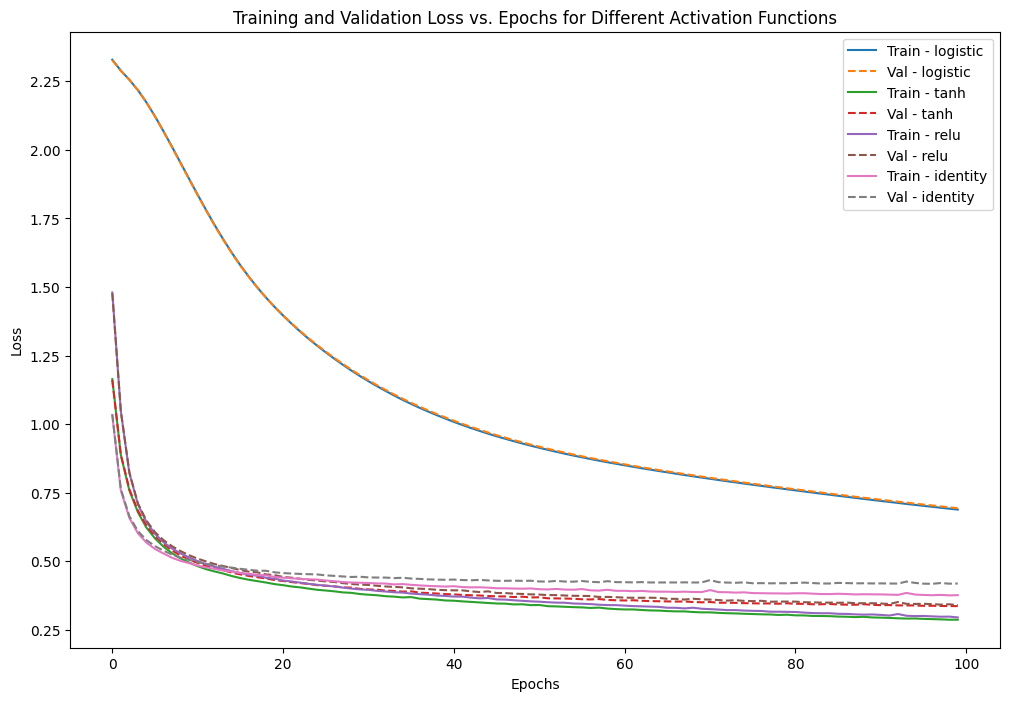

In [54]:
plt.figure(figsize=(12, 8))
for activation in activations:
    plt.plot(results[activation]['train_losses'], label=f'Train - {activation}')
    plt.plot(results[activation]['val_losses'], linestyle='--', label=f'Val - {activation}')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss vs. Epochs for Different Activation Functions')
plt.legend()
plt.show()

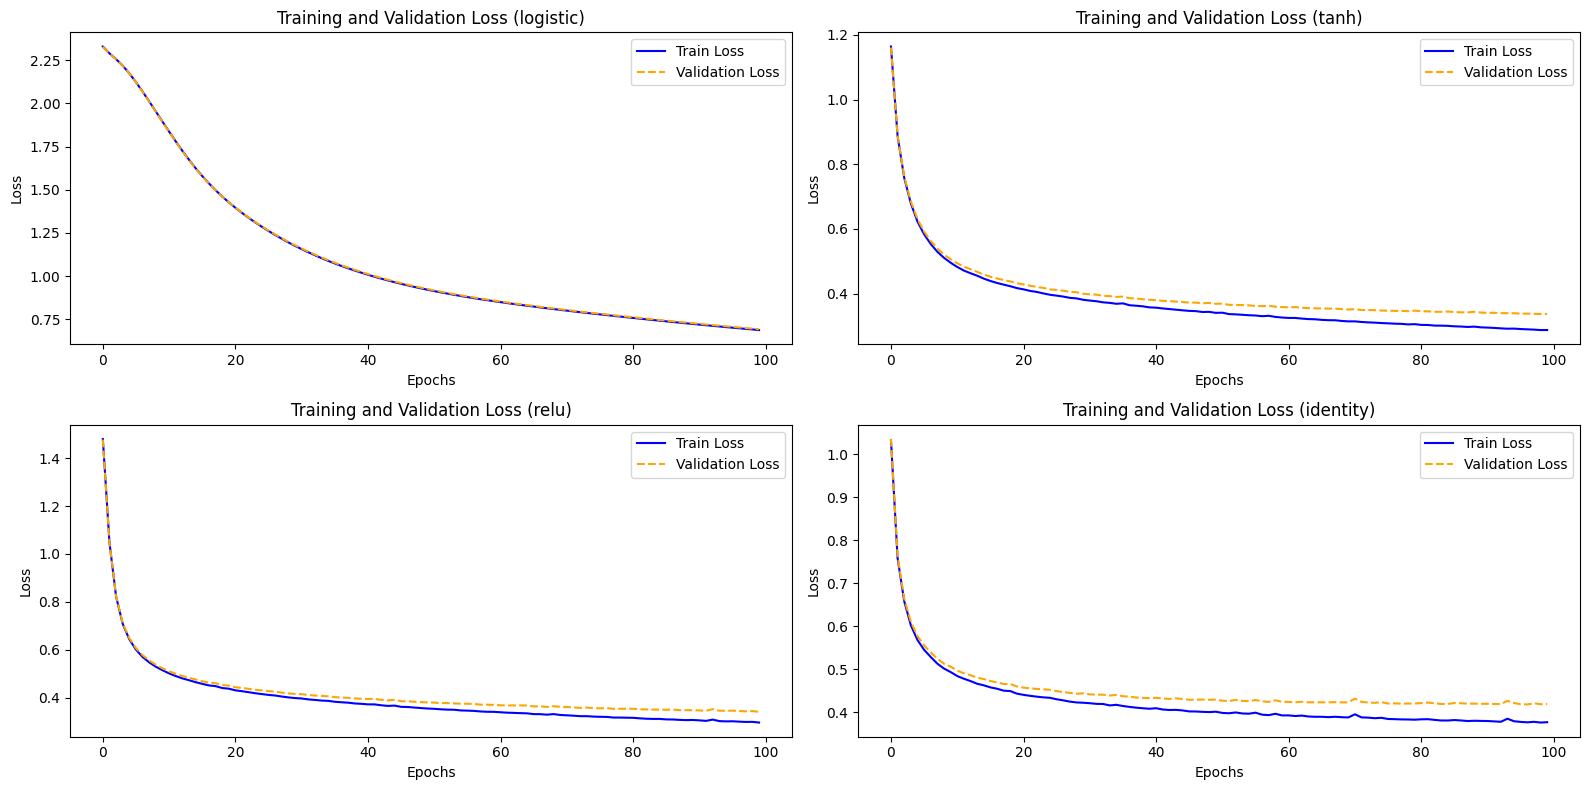

In [67]:
import matplotlib.pyplot as plt

# Set up a grid of subplots with one row and as many columns as activation functions
plt.figure(figsize=(16, 8))
for i, activation in enumerate(activations, 1):
    plt.subplot(2, 2, i)  # Arrange in a 2x2 grid (adjust grid size if you have more activations)
    plt.plot(results[activation]['train_losses'], label='Train Loss', color='blue')
    plt.plot(results[activation]['val_losses'], linestyle='--', label='Validation Loss', color='orange')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Training and Validation Loss ({activation})')
    plt.legend()

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV

# parameter grid for grid search
param_grid = {
    'solver': ['adam'], 
    'learning_rate_init': [1e-4, 1e-5], 
    'batch_size': [128, 256] 
}

# Initialize the MLP with the best activation function and other fixed parameters
mlp_grid = MLPClassifier(hidden_layer_sizes=[128, 64, 32], activation=best_activation, max_iter=50, random_state=42)

# Perform grid search
grid_search = GridSearchCV(estimator=mlp_grid, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(train_pixels, train_labels)

print("Best parameters found by grid search:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)


Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best parameters found by grid search: {'batch_size': 128, 'learning_rate_init': 0.0001, 'solver': 'adam'}
Best cross-validation accuracy: 0.8812400123052381


PART-4

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error



In [57]:
layer_sizes = [64, 32, 16, 32, 64]
learning_rate = 5e-5
epochs2 = 100

Relu 


In [58]:
relu_mdl = MLPRegressor(hidden_layer_sizes=layer_sizes, activation='relu', solver='adam', 
                          learning_rate_init=learning_rate, random_state=42)

training_losses_relu= []
validation_losses_relu = [] 

for epoch in range(epochs2):
    relu_mdl.partial_fit(train_pixels, train_pixels)  # Regeneration task: target is the input
    training_loss = mean_squared_error(train_pixels, relu_mdl.predict(train_pixels))
    validation_loss = mean_squared_error(val_pixels, relu_mdl.predict(val_pixels))
       
    training_losses_relu.append(training_loss)
    validation_losses_relu.append(validation_loss)
    
    print(f"Epoch {epoch + 1}/{epochs2} - ReLU Model - Training Loss: {training_loss:.4f}, Validation Loss: {validation_loss:.4f}")

Epoch 1/100 - ReLU Model - Training Loss: 0.0749, Validation Loss: 0.0745
Epoch 2/100 - ReLU Model - Training Loss: 0.0589, Validation Loss: 0.0585
Epoch 3/100 - ReLU Model - Training Loss: 0.0484, Validation Loss: 0.0480
Epoch 4/100 - ReLU Model - Training Loss: 0.0432, Validation Loss: 0.0427
Epoch 5/100 - ReLU Model - Training Loss: 0.0408, Validation Loss: 0.0404
Epoch 6/100 - ReLU Model - Training Loss: 0.0386, Validation Loss: 0.0382
Epoch 7/100 - ReLU Model - Training Loss: 0.0360, Validation Loss: 0.0357
Epoch 8/100 - ReLU Model - Training Loss: 0.0334, Validation Loss: 0.0331
Epoch 9/100 - ReLU Model - Training Loss: 0.0314, Validation Loss: 0.0311
Epoch 10/100 - ReLU Model - Training Loss: 0.0300, Validation Loss: 0.0298
Epoch 11/100 - ReLU Model - Training Loss: 0.0292, Validation Loss: 0.0290
Epoch 12/100 - ReLU Model - Training Loss: 0.0286, Validation Loss: 0.0284
Epoch 13/100 - ReLU Model - Training Loss: 0.0280, Validation Loss: 0.0278
Epoch 14/100 - ReLU Model - Traini

In [59]:
identity_mdl = MLPRegressor(hidden_layer_sizes=layer_sizes, activation='identity', solver='adam', 
                              learning_rate_init=learning_rate, random_state=42)

training_losses_identity= [] 
validation_losses_identity = []

for epoch in range(epochs2):
    identity_mdl.partial_fit(train_pixels, train_pixels)
    training_loss = mean_squared_error(train_pixels, identity_mdl.predict(train_pixels))
    validation_loss = mean_squared_error(val_pixels, identity_mdl.predict(val_pixels))
    
    training_losses_identity.append(training_loss)
    validation_losses_identity.append(validation_loss)
    
    print(f"Epoch {epoch + 1}/{epochs2} - Identity Model - Training Loss: {training_loss}, Validation Loss: {validation_loss}")

Epoch 1/100 - Identity Model - Training Loss: 0.07495474233572878, Validation Loss: 0.07449018835948218
Epoch 2/100 - Identity Model - Training Loss: 0.05608701003927992, Validation Loss: 0.05564198829127723
Epoch 3/100 - Identity Model - Training Loss: 0.045854298171644645, Validation Loss: 0.045430165591550956
Epoch 4/100 - Identity Model - Training Loss: 0.03996942035702729, Validation Loss: 0.039577413243289956
Epoch 5/100 - Identity Model - Training Loss: 0.035752034827224256, Validation Loss: 0.03540117746142499
Epoch 6/100 - Identity Model - Training Loss: 0.03265735285248323, Validation Loss: 0.03235302261811751
Epoch 7/100 - Identity Model - Training Loss: 0.03045249734885858, Validation Loss: 0.030195225259001066
Epoch 8/100 - Identity Model - Training Loss: 0.02904261063582509, Validation Loss: 0.028817637066683263
Epoch 9/100 - Identity Model - Training Loss: 0.028084811774799427, Validation Loss: 0.027878595136355128
Epoch 10/100 - Identity Model - Training Loss: 0.0273556

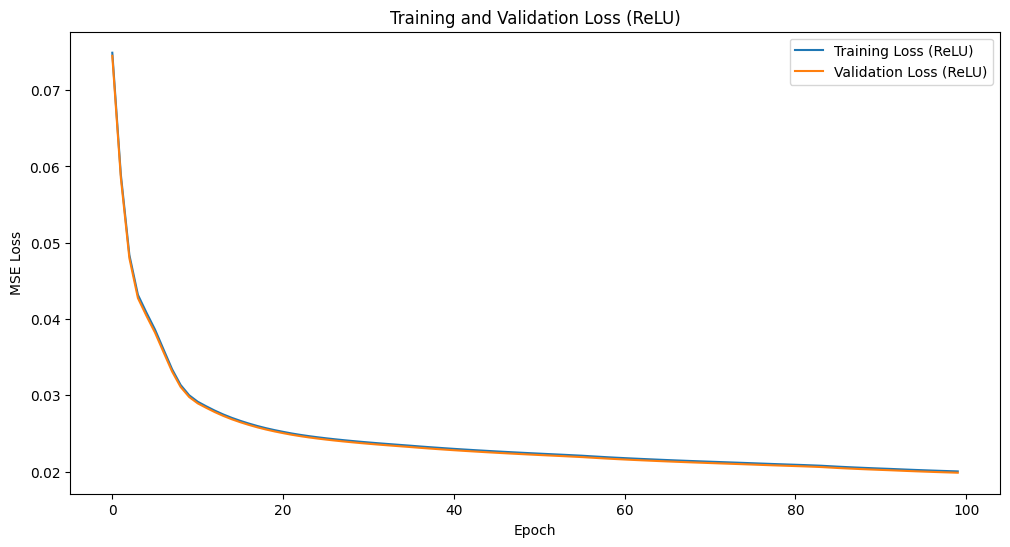

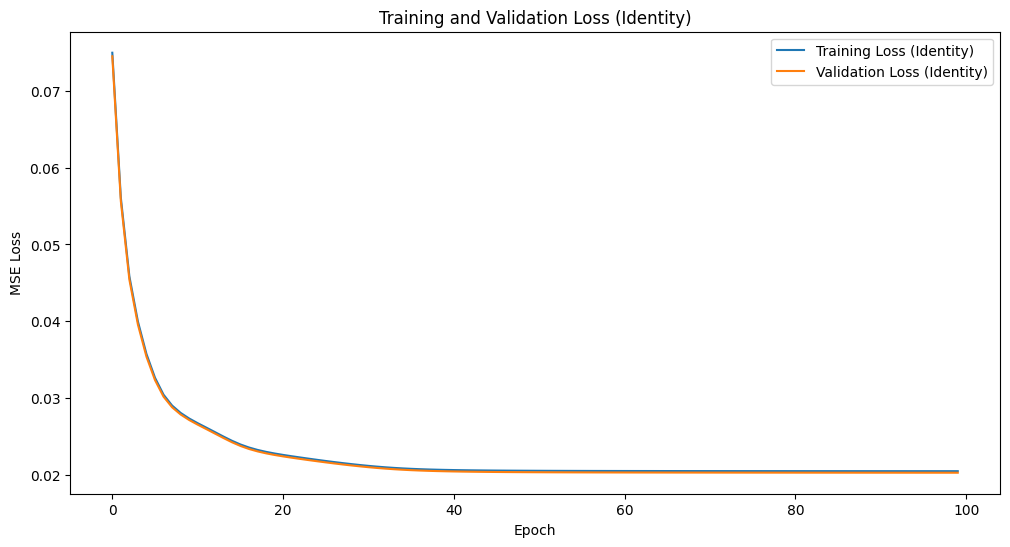

In [62]:
# Plot training and validation losses for 'relu' model
plt.figure(figsize=(12, 6))
plt.plot(training_losses_relu, label='Training Loss (ReLU)')
plt.plot(validation_losses_relu, label='Validation Loss (ReLU)')
plt.title('Training and Validation Loss (ReLU)')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()

# Plot training and validation losses for 'identity' model
plt.figure(figsize=(12, 6))
plt.plot(training_losses_identity, label='Training Loss (Identity)')
plt.plot(validation_losses_identity, label='Validation Loss (Identity)')
plt.title('Training and Validation Loss (Identity)')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()


In [ ]:
# relu_classifier.fit(train_features_relu, train_labels)  # Replace train_labels with your target labels for classification
# predictions_relu = relu_classifier.predict(test_features_relu)
# accuracy_relu = accuracy_score(test_labels1, predictions_relu)  # Replace test_labels with the actual test labels

# print(f"ReLU-based Classifier Accuracy: {accuracy_relu}")

In [60]:
from sklearn.metrics import r2_score

test_r2_relu = r2_score(test_pixels_normalized, relu_mdl.predict(test_pixels_normalized))
print(f"ReLU Model - Test R²: {test_r2_relu}")

ReLU Model - Test R²: 0.6529935364381618


In [61]:

test_r2_iden = r2_score(test_pixels_normalized, identity_mdl.predict(test_pixels_normalized))
print(f"Iden Model - Test R²: {test_r2_iden}")

Iden Model - Test R²: 0.6497690441998021


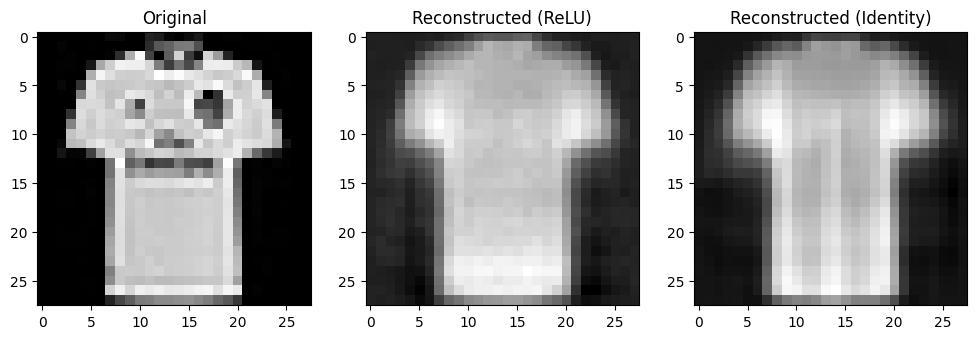

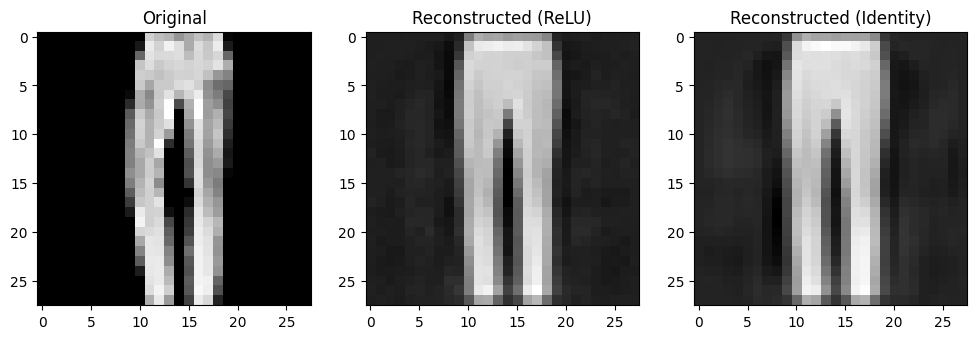

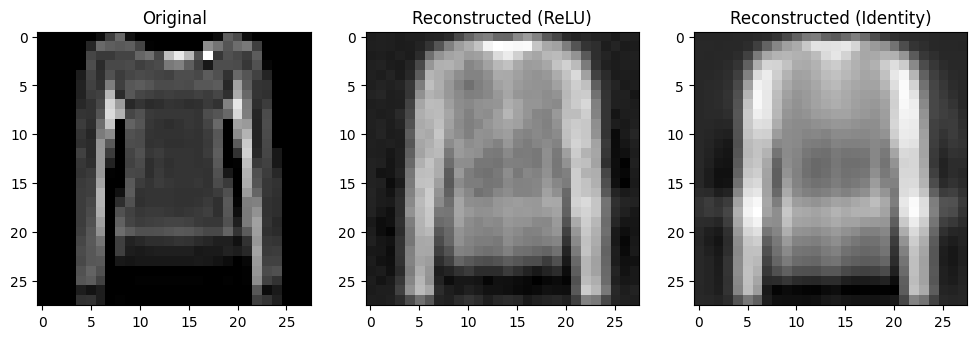

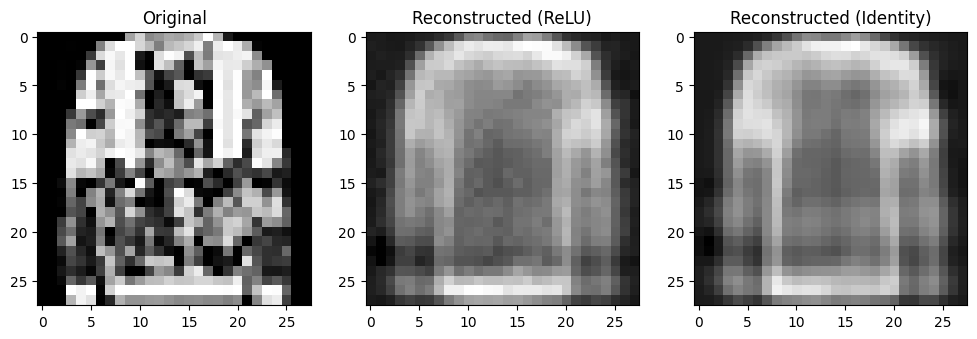

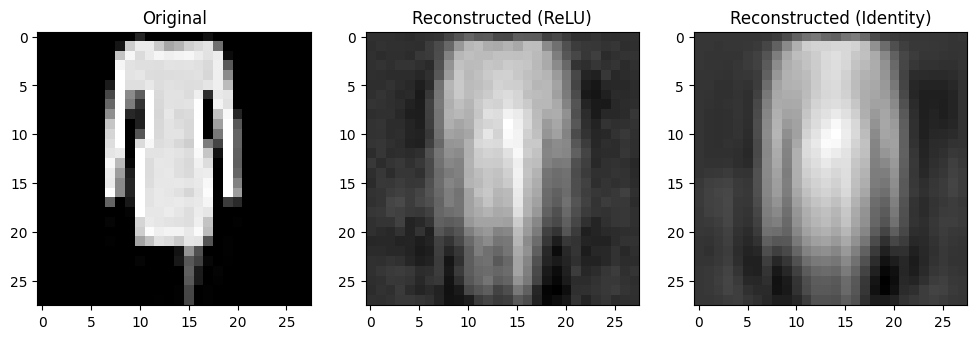

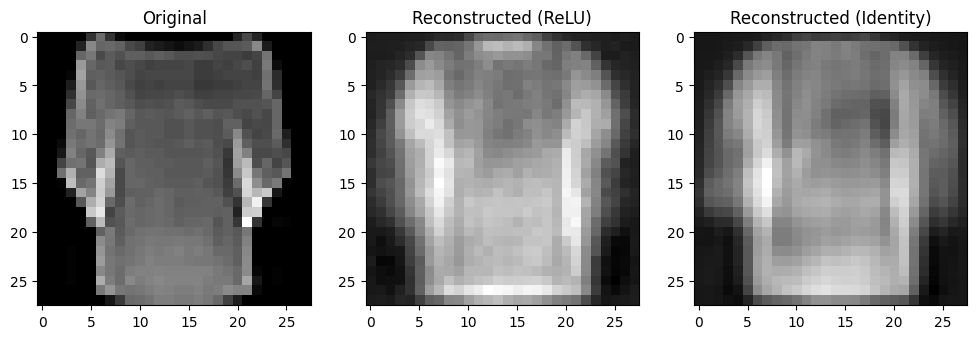

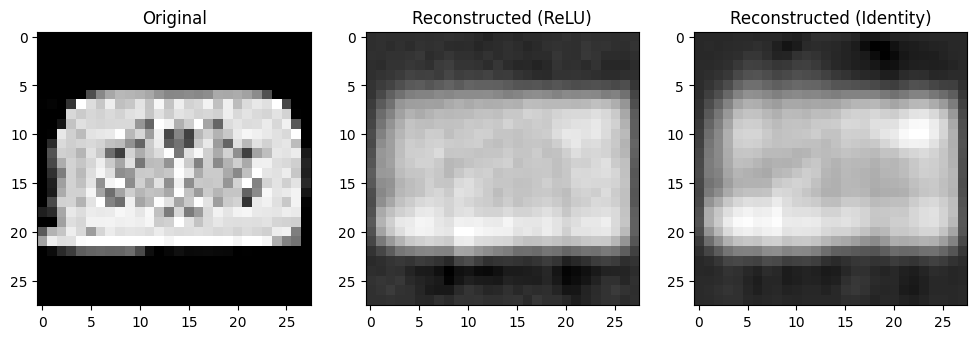

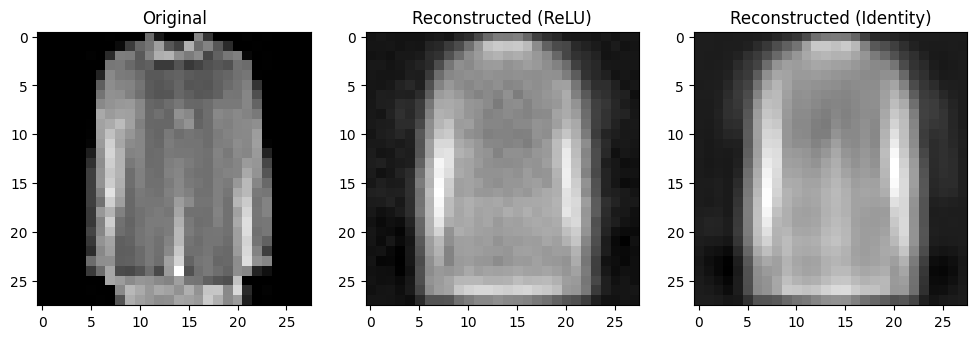

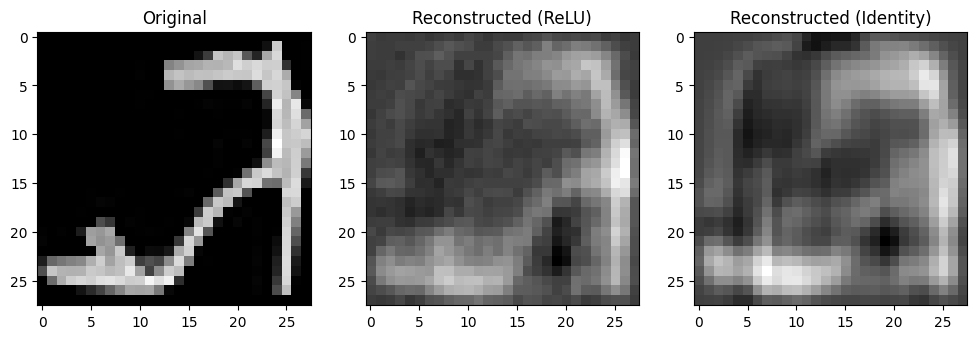

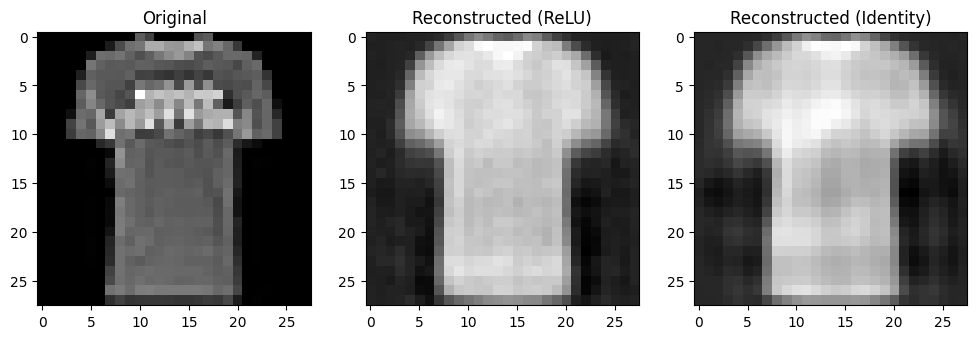

In [63]:
# Select 10 random test samples
test_samples = test_pixels_normalized[:10]

test_samples = np.array(test_samples)

# Generate reconstructions
reconstructed_relu = relu_mdl.predict(test_samples)
reconstructed_identity = identity_mdl.predict(test_samples)

# Visualize original vs. reconstructed for both models
for i in range(10):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.imshow(test_samples[i].reshape(28, 28), cmap='gray')  # Reshape as per image dimensions
    plt.title('Original')
    
    plt.subplot(1, 3, 2)
    plt.imshow(reconstructed_relu[i].reshape(28, 28), cmap='gray')  # Adjust dimensions as needed
    plt.title('Reconstructed (ReLU)')
    
    plt.subplot(1, 3, 3)
    plt.imshow(reconstructed_identity[i].reshape(28, 28), cmap='gray')
    plt.title('Reconstructed (Identity)')
    
    plt.show()


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Define the feature vector size 'a'
a = layer_sizes[2]  # For instance, you can choose the third layer size as 'a', which is 16 here

# Extract the feature vectors from the trained relu_mdl and identity_mdl
def extract_features(model, data):
    # Extract the outputs of the penultimate layer for each sample
    hidden_layer_values = model.predict(data)
    return hidden_layer_values

# Get feature vectors for both train and test sets
train_features_relu = extract_features(relu_mdl, train_pixels)
test_features_relu = extract_features(relu_mdl, test_pixels_normalized)

train_features_identity = extract_features(identity_mdl, train_pixels)
test_features_identity = extract_features(identity_mdl, test_pixels_normalized)

# Initialize the smaller MLP classifiers with 2 hidden layers of size 'a'
relu_classifier = MLPClassifier(hidden_layer_sizes=(a, a), solver='adam', 
                                learning_rate_init=learning_rate, max_iter=200, random_state=42)
identity_classifier = MLPClassifier(hidden_layer_sizes=(a, a), solver='adam', 
                                    learning_rate_init=learning_rate, max_iter=200, random_state=42)

# Training the relu-based classifier
relu_classifier.fit(train_features_relu, train_labels)  # Replace train_labels with your target labels for classification
predictions_relu = relu_classifier.predict(test_features_relu)
accuracy_relu = accuracy_score(test_labels1, predictions_relu)  # Replace test_labels with the actual test labels

print(f"ReLU-based Classifier Accuracy: {accuracy_relu}")

# Training the identity-based classifier
identity_classifier.fit(train_features_identity, train_labels)
predictions_identity = identity_classifier.predict(test_features_identity)
accuracy_identity = accuracy_score(test_labels1, predictions_identity)

print(f"Identity-based Classifier Accuracy: {accuracy_identity}")


ReLU-based Classifier Accuracy: 0.8182
Identity-based Classifier Accuracy: 0.8222
